In [238]:
import pandas as pd
import numpy as np

# Data Loading and Cleaning

### Deals

In [239]:
deals_raw = pd.read_csv("../data/NBA_deals_history - deals.csv")
deals_raw.head(5)

,Player,Pos,Team Signed With,Age At Signing,Start,End,Yrs,Value,AAV
0,Jayson Tatum,PF,BOS BOS,26,2025,2029.0,5.0,"$313,933,410","$62,786,682"
1,Jaylen Brown,SF,BOS BOS,26,2024,2028.0,5.0,"$285,393,640","$57,078,728"
2,Nikola Jokic,C,DEN DEN,27,2023,2027.0,5.0,"$276,122,630","$55,224,526"
3,Shai Gilgeous-Alexander,PG,OKC OKC,26,2027,2030.0,4.0,"$273,302,400","$68,325,600"
4,Evan Mobley,PF,CLE CLE,23,2025,2029.0,5.0,"$269,085,780","$53,817,156"


In [240]:
# Rename weirdly formatted column names
deals_raw.rename(columns={'Age                     At Signing': 'Age'}, inplace=True)
deals_raw.rename(columns={'Team                     Signed With': 'Team'}, inplace=True)

# Fix datatypes
deals_raw['Value'] = (deals_raw['Value'].replace('[\$,]', '', regex=True).astype('Int64'))
deals_raw['AAV'] = (deals_raw['AAV'].replace('[\$,]', '', regex=True).astype('Int64'))
deals_raw['Age'] = (deals_raw['Age'].replace('[\,]', '', regex=True).astype('Int64'))

In [241]:
deals_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9286 entries, 0 to 9285
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  9286 non-null   object 
 1   Pos     9286 non-null   object 
 2   Team    9286 non-null   object 
 3   Age     9031 non-null   Int64  
 4   Start   9286 non-null   int64  
 5   End     9280 non-null   float64
 6   Yrs     9271 non-null   float64
 7   Value   8353 non-null   Int64  
 8   AAV     8352 non-null   Int64  
dtypes: Int64(3), float64(2), int64(1), object(3)
memory usage: 680.3+ KB


In [242]:
standard_deals_only = deals_raw[(deals_raw['Yrs'] < 10) & (deals_raw['Value'] > 1000000)]

In [243]:
standard_deals = standard_deals_only

In [244]:
deals_nulls = standard_deals.isnull().sum().sort_values(ascending=False)
deals_nulls.head(9)

Age       124
Player      0
Pos         0
Team        0
Start       0
End         0
Yrs         0
Value       0
AAV         0
dtype: int64

In [245]:
# Replace missing age values with league median
standard_deals['Age'] = standard_deals['Age'].fillna(standard_deals['Age'].median())

# Check that nulls are gone
deals_nulls = standard_deals.isnull().sum().sort_values(ascending=False)
deals_nulls.head(9)

/var/folders/xj/9h4bjml967jfwyry9fsh16bc0000gn/T/ipykernel_83020/2685949337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_deals['Age'] = standard_deals['Age'].fillna(standard_deals['Age'].median())


Player    0
Pos       0
Team      0
Age       0
Start     0
End       0
Yrs       0
Value     0
AAV       0
dtype: int64

In [248]:
standard_deals = standard_deals.drop(columns=['Team'], axis=1)

In [250]:
deals = standard_deals
deals.head()

,Player,Pos,Age,Start,End,Yrs,Value,AAV
0,Jayson Tatum,PF,26,2025,2029.0,5.0,313933410,62786682
1,Jaylen Brown,SF,26,2024,2028.0,5.0,285393640,57078728
2,Nikola Jokic,C,27,2023,2027.0,5.0,276122630,55224526
3,Shai Gilgeous-Alexander,PG,26,2027,2030.0,4.0,273302400,68325600
4,Evan Mobley,PF,23,2025,2029.0,5.0,269085780,53817156


### Stats

In [251]:
stats_raw = pd.read_csv("../data/kaggle_data/nba.csv")
stats_raw.drop('TEAM_ID', axis=1, inplace=True)
stats_raw.sort_values(by='PLAYER_ID', ascending=True, inplace=True)
stats_raw.head(5)

,year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
384,2012-13,Regular%20Season,255,385,Grant Hill,LAC,29,437,38,98,0.388,3,11,0.273,14,24,0.583,6,43,49,26,11,7,25,39,93,91,1.04,0.44
647,2012-13,Playoffs,255,179,Grant Hill,LAC,1,20,2,4,0.500,0,0,0.000,0,0,0.000,2,2,4,2,0,0,1,5,4,7,2.00,0.00
429,2012-13,Regular%20Season,436,430,Juwan Howard,MIA,7,51,10,19,0.526,0,0,0.000,1,1,1.000,0,8,8,6,0,0,4,9,21,22,1.50,0.00
214,2012-13,Regular%20Season,467,215,Jason Kidd,NYK,76,2043,152,409,0.372,114,325,0.351,40,48,0.833,50,273,323,249,125,25,76,125,458,839,3.28,1.65
622,2012-13,Playoffs,467,154,Jason Kidd,NYK,12,247,3,25,0.120,3,17,0.176,2,2,1.000,7,35,42,24,12,4,13,12,11,58,1.85,0.92


- we have stats on seasons from 2012-13 to 2023-24

Change Season_type values for nicer column names after pivoting

In [252]:
stats_raw['Season_type'] = np.where(stats_raw['Season_type'] == 'Regular%20Season', 'RegularSeason', stats_raw['Season_type'])

Pivot the table so that regular and playoff stats are on the same row

In [315]:
wide = stats_raw.pivot(index=['PLAYER_ID', 'PLAYER', 'year'], columns='Season_type').sort_index()
wide.columns = [f'{stat}_{stype}' for stat, stype in wide.columns]
stats = wide.reset_index()
stats.sort_values(by='PLAYER_ID', ascending=True, inplace=True)
stats = stats.drop(columns=['RANK_Playoffs', 'RANK_RegularSeason'])
stats.head(2)

,PLAYER_ID,PLAYER,year,TEAM_Playoffs,TEAM_RegularSeason,GP_Playoffs,GP_RegularSeason,MIN_Playoffs,MIN_RegularSeason,FGM_Playoffs,FGM_RegularSeason,FGA_Playoffs,FGA_RegularSeason,FG_PCT_Playoffs,FG_PCT_RegularSeason,FG3M_Playoffs,FG3M_RegularSeason,FG3A_Playoffs,FG3A_RegularSeason,FG3_PCT_Playoffs,FG3_PCT_RegularSeason,FTM_Playoffs,FTM_RegularSeason,FTA_Playoffs,FTA_RegularSeason,FT_PCT_Playoffs,FT_PCT_RegularSeason,OREB_Playoffs,OREB_RegularSeason,DREB_Playoffs,DREB_RegularSeason,REB_Playoffs,REB_RegularSeason,AST_Playoffs,AST_RegularSeason,STL_Playoffs,STL_RegularSeason,BLK_Playoffs,BLK_RegularSeason,TOV_Playoffs,TOV_RegularSeason,PF_Playoffs,PF_RegularSeason,PTS_Playoffs,PTS_RegularSeason,EFF_Playoffs,EFF_RegularSeason,AST_TOV_Playoffs,AST_TOV_RegularSeason,STL_TOV_Playoffs,STL_TOV_RegularSeason
0,255,Grant Hill,2012-13,LAC,LAC,1.0,29.0,20.0,437.0,2.0,38.0,4.0,98.0,0.5,0.388,0.0,3.0,0.0,11.0,0.0,0.273,0.0,14.0,0.0,24.0,0.0,0.583,2.0,6.0,2.0,43.0,4.0,49.0,2.0,26.0,0.0,11.0,0.0,7.0,1.0,25.0,5.0,39.0,4.0,93.0,7.0,91.0,2.0,1.04,0.0,0.44
1,436,Juwan Howard,2012-13,NaN,MIA,NaN,7.0,NaN,51.0,NaN,10.0,NaN,19.0,NaN,0.526,NaN,0.0,NaN,0.0,NaN,0.000,NaN,1.0,NaN,1.0,NaN,1.000,NaN,0.0,NaN,8.0,NaN,8.0,NaN,6.0,NaN,0.0,NaN,0.0,NaN,4.0,NaN,9.0,NaN,21.0,NaN,22.0,NaN,1.50,NaN,0.00


### Merged

Combine our two tables, **deals** and **stats** on deals.player = stats.PLAYER and only on years where deals.start = stats.year

- Before we can do this, we need to reformat year to match the year format in deals. Since deals are signed in the summer following a season, we can just look at the year that the second half of the season happens in in our stats table. Example: 2012-13 -> 2013

In [316]:
stats["year"] = stats["year"].str.split("-").str[1].astype(int) + 2000

In [317]:
## Prepare to merge datasets
print("entries in stats: " + str(len(stats)))
print("entries in deals: " + str(len(deals)))

entries in stats: 6268
entries in deals: 5520


In [318]:
merged = pd.merge(stats, deals,
                  left_on=["PLAYER", "year"],
                  right_on=["Player", "Start"],
                  how="inner")
print("matches: " + str(len(merged)))
merged.head(5)

matches: 2149


,PLAYER_ID,PLAYER,year,TEAM_Playoffs,TEAM_RegularSeason,GP_Playoffs,GP_RegularSeason,MIN_Playoffs,MIN_RegularSeason,FGM_Playoffs,FGM_RegularSeason,FGA_Playoffs,FGA_RegularSeason,FG_PCT_Playoffs,FG_PCT_RegularSeason,FG3M_Playoffs,FG3M_RegularSeason,FG3A_Playoffs,FG3A_RegularSeason,FG3_PCT_Playoffs,FG3_PCT_RegularSeason,FTM_Playoffs,FTM_RegularSeason,FTA_Playoffs,FTA_RegularSeason,FT_PCT_Playoffs,FT_PCT_RegularSeason,OREB_Playoffs,OREB_RegularSeason,DREB_Playoffs,DREB_RegularSeason,REB_Playoffs,REB_RegularSeason,AST_Playoffs,AST_RegularSeason,STL_Playoffs,STL_RegularSeason,BLK_Playoffs,BLK_RegularSeason,TOV_Playoffs,TOV_RegularSeason,PF_Playoffs,PF_RegularSeason,PTS_Playoffs,PTS_RegularSeason,EFF_Playoffs,EFF_RegularSeason,AST_TOV_Playoffs,AST_TOV_RegularSeason,STL_TOV_Playoffs,STL_TOV_RegularSeason,Player,Pos,Age,Start,End,Yrs,Value,AAV
0,708,Kevin Garnett,2015,NaN,MIN,NaN,47.0,NaN,952.0,NaN,143.0,NaN,306.0,NaN,0.467,NaN,1.0,NaN,7.0,NaN,0.143,NaN,36.0,NaN,45.0,NaN,0.800,NaN,48.0,NaN,263.0,NaN,311.0,NaN,77.0,NaN,46.0,NaN,17.0,NaN,46.0,NaN,109.0,NaN,323.0,NaN,556.0,NaN,1.67,NaN,1.00,Kevin Garnett,PF,38,2015,2016.0,2.0,16500000,8250000
1,948,Marcus Camby,2013,NYK,NYK,3.0,24.0,3.0,250.0,1.0,17.0,1.0,53.0,1.000,0.321,0.0,0.0,0.0,0.0,0.000,0.000,0.0,8.0,0.0,19.0,0.000,0.421,1.0,24.0,1.0,56.0,2.0,80.0,0.0,14.0,0.0,7.0,0.0,14.0,1.0,15.0,1.0,28.0,2.0,42.0,3.0,95.0,0.0,0.93,0.00,0.47,Marcus Camby,C,38,2013,2013.0,1.0,1399507,1399507
2,965,Derek Fisher,2013,OKC,OKC,11.0,33.0,261.0,575.0,32.0,55.0,70.0,161.0,0.457,0.342,24.0,30.0,51.0,80.0,0.471,0.375,8.0,35.0,12.0,38.0,0.667,0.921,1.0,2.0,16.0,35.0,17.0,37.0,8.0,47.0,7.0,19.0,1.0,3.0,8.0,30.0,33.0,55.0,96.0,175.0,79.0,142.0,1.0,1.57,0.88,0.63,Derek Fisher,PG,38,2013,2013.0,1.0,1399507,1399507
3,977,Kobe Bryant,2014,NaN,LAL,NaN,6.0,NaN,177.0,NaN,31.0,NaN,73.0,NaN,0.425,NaN,3.0,NaN,16.0,NaN,0.188,NaN,18.0,NaN,21.0,NaN,0.857,NaN,2.0,NaN,24.0,NaN,26.0,NaN,38.0,NaN,7.0,NaN,1.0,NaN,34.0,NaN,9.0,NaN,83.0,NaN,76.0,NaN,1.12,NaN,0.21,Kobe Bryant,SF,35,2014,2015.0,2.0,48500000,24250000
4,979,Jermaine O'Neal,2013,NaN,PHX,NaN,55.0,NaN,1029.0,NaN,179.0,NaN,371.0,NaN,0.482,NaN,0.0,NaN,0.0,NaN,0.000,NaN,96.0,NaN,115.0,NaN,0.835,NaN,82.0,NaN,211.0,NaN,293.0,NaN,42.0,NaN,19.0,NaN,78.0,NaN,73.0,NaN,126.0,NaN,454.0,NaN,602.0,NaN,0.57,NaN,0.26,Jermaine O'Neal,C,34,2013,2013.0,1.0,2000000,2000000


In [319]:
merged['TEAM_Playoffs'] = merged['TEAM_Playoffs'].fillna('MissedPlayoffs')
data = merged.fillna(0)
data.head()

,PLAYER_ID,PLAYER,year,TEAM_Playoffs,TEAM_RegularSeason,GP_Playoffs,GP_RegularSeason,MIN_Playoffs,MIN_RegularSeason,FGM_Playoffs,FGM_RegularSeason,FGA_Playoffs,FGA_RegularSeason,FG_PCT_Playoffs,FG_PCT_RegularSeason,FG3M_Playoffs,FG3M_RegularSeason,FG3A_Playoffs,FG3A_RegularSeason,FG3_PCT_Playoffs,FG3_PCT_RegularSeason,FTM_Playoffs,FTM_RegularSeason,FTA_Playoffs,FTA_RegularSeason,FT_PCT_Playoffs,FT_PCT_RegularSeason,OREB_Playoffs,OREB_RegularSeason,DREB_Playoffs,DREB_RegularSeason,REB_Playoffs,REB_RegularSeason,AST_Playoffs,AST_RegularSeason,STL_Playoffs,STL_RegularSeason,BLK_Playoffs,BLK_RegularSeason,TOV_Playoffs,TOV_RegularSeason,PF_Playoffs,PF_RegularSeason,PTS_Playoffs,PTS_RegularSeason,EFF_Playoffs,EFF_RegularSeason,AST_TOV_Playoffs,AST_TOV_RegularSeason,STL_TOV_Playoffs,STL_TOV_RegularSeason,Player,Pos,Age,Start,End,Yrs,Value,AAV
0,708,Kevin Garnett,2015,MissedPlayoffs,MIN,0.0,47.0,0.0,952.0,0.0,143.0,0.0,306.0,0.000,0.467,0.0,1.0,0.0,7.0,0.000,0.143,0.0,36.0,0.0,45.0,0.000,0.800,0.0,48.0,0.0,263.0,0.0,311.0,0.0,77.0,0.0,46.0,0.0,17.0,0.0,46.0,0.0,109.0,0.0,323.0,0.0,556.0,0.0,1.67,0.00,1.00,Kevin Garnett,PF,38,2015,2016.0,2.0,16500000,8250000
1,948,Marcus Camby,2013,NYK,NYK,3.0,24.0,3.0,250.0,1.0,17.0,1.0,53.0,1.000,0.321,0.0,0.0,0.0,0.0,0.000,0.000,0.0,8.0,0.0,19.0,0.000,0.421,1.0,24.0,1.0,56.0,2.0,80.0,0.0,14.0,0.0,7.0,0.0,14.0,1.0,15.0,1.0,28.0,2.0,42.0,3.0,95.0,0.0,0.93,0.00,0.47,Marcus Camby,C,38,2013,2013.0,1.0,1399507,1399507
2,965,Derek Fisher,2013,OKC,OKC,11.0,33.0,261.0,575.0,32.0,55.0,70.0,161.0,0.457,0.342,24.0,30.0,51.0,80.0,0.471,0.375,8.0,35.0,12.0,38.0,0.667,0.921,1.0,2.0,16.0,35.0,17.0,37.0,8.0,47.0,7.0,19.0,1.0,3.0,8.0,30.0,33.0,55.0,96.0,175.0,79.0,142.0,1.0,1.57,0.88,0.63,Derek Fisher,PG,38,2013,2013.0,1.0,1399507,1399507
3,977,Kobe Bryant,2014,MissedPlayoffs,LAL,0.0,6.0,0.0,177.0,0.0,31.0,0.0,73.0,0.000,0.425,0.0,3.0,0.0,16.0,0.000,0.188,0.0,18.0,0.0,21.0,0.000,0.857,0.0,2.0,0.0,24.0,0.0,26.0,0.0,38.0,0.0,7.0,0.0,1.0,0.0,34.0,0.0,9.0,0.0,83.0,0.0,76.0,0.0,1.12,0.00,0.21,Kobe Bryant,SF,35,2014,2015.0,2.0,48500000,24250000
4,979,Jermaine O'Neal,2013,MissedPlayoffs,PHX,0.0,55.0,0.0,1029.0,0.0,179.0,0.0,371.0,0.000,0.482,0.0,0.0,0.0,0.0,0.000,0.000,0.0,96.0,0.0,115.0,0.000,0.835,0.0,82.0,0.0,211.0,0.0,293.0,0.0,42.0,0.0,19.0,0.0,78.0,0.0,73.0,0.0,126.0,0.0,454.0,0.0,602.0,0.0,0.57,0.00,0.26,Jermaine O'Neal,C,34,2013,2013.0,1.0,2000000,2000000


# Feature Engineering

Normalize target variable from: salary -> salary as a percentage of league imposed maximum salary cap

In [320]:
salary_cap_by_year = {
    2013: 58679000,
    2014: 63065000,
    2015: 70000000,
    2016: 94143000,
    2017: 99093000,
    2018: 101869000,
    2019: 109140000,
    2020: 109140000,
    2021: 112414000,
    2022: 123655000,
    2023: 136021000,
    2024: 140588000
}

In [321]:
data['SalaryCap'] = data['year'].map(salary_cap_by_year)

In [322]:
# this is our first target variable (the other is Yrs)
data['salary_ratio'] = data['AAV'] / data['SalaryCap']

In [323]:
# sanity check
data[['Player', 'year', 'Value', 'Yrs', 'AAV', 'SalaryCap', 'salary_ratio']].describe()

,year,Value,Yrs,AAV,SalaryCap,salary_ratio
count,2149.000000,2149.0,2149.000000,2149.0,2.149000e+03,2149.0
mean,2019.027455,20566067.359702,2.026989,6642306.142392,1.051848e+08,0.064734
std,3.406874,38576368.182384,1.185031,8974806.652942,2.482145e+07,0.08273
min,2013.000000,1010371.0,1.000000,510634.0,5.867900e+07,0.007295
25%,2016.000000,1902133.0,1.000000,1640080.0,9.414300e+07,0.015383
50%,2019.000000,3466716.0,2.000000,2500000.0,1.091400e+08,0.0235
75%,2022.000000,19500000.0,3.000000,8000000.0,1.236550e+08,0.080769
max,2024.000000,285393640.0,5.000000,57078728.0,1.405880e+08,0.435392


In [364]:
data.head()
print(data.columns)

Index(['PLAYER_ID', 'PLAYER', 'year', 'TEAM_Playoffs', 'TEAM_RegularSeason',
       'GP_Playoffs', 'GP_RegularSeason', 'MIN_Playoffs', 'MIN_RegularSeason',
       'FGM_Playoffs', 'FGM_RegularSeason', 'FGA_Playoffs',
       'FGA_RegularSeason', 'FG_PCT_Playoffs', 'FG_PCT_RegularSeason',
       'FG3M_Playoffs', 'FG3M_RegularSeason', 'FG3A_Playoffs',
       'FG3A_RegularSeason', 'FG3_PCT_Playoffs', 'FG3_PCT_RegularSeason',
       'FTM_Playoffs', 'FTM_RegularSeason', 'FTA_Playoffs',
       'FTA_RegularSeason', 'FT_PCT_Playoffs', 'FT_PCT_RegularSeason',
       'OREB_Playoffs', 'OREB_RegularSeason', 'DREB_Playoffs',
       'DREB_RegularSeason', 'REB_Playoffs', 'REB_RegularSeason',
       'AST_Playoffs', 'AST_RegularSeason', 'STL_Playoffs',
       'STL_RegularSeason', 'BLK_Playoffs', 'BLK_RegularSeason',
       'TOV_Playoffs', 'TOV_RegularSeason', 'PF_Playoffs', 'PF_RegularSeason',
       'PTS_Playoffs', 'PTS_RegularSeason', 'EFF_Playoffs',
       'EFF_RegularSeason', 'AST_TOV_Playoffs', 'AST

# Model Training and Evaluation

In [357]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.dummy import DummyRegressor
import xgboost as xgb

In [342]:
# Select features/target variable
X = data.drop(columns=['PLAYER_ID', "PLAYER", 'Player', 'Start', 'End', 'Yrs', 'Value', 'AAV', 'SalaryCap', 'salary_ratio'])
y = data['salary_ratio']

X = pd.get_dummies(X, columns=['Pos', 'TEAM_Playoffs', 'TEAM_RegularSeason'], drop_first=True)

In [343]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [346]:
# establish models
models = {
    "MeanBaseline": DummyRegressor(strategy="mean"),
    "MedianBaseline": DummyRegressor(strategy="median"),
    "LinearRegression": LinearRegression(),
    "Ridge": RidgeCV(alphas=np.logspace(-3, 3, 7)),
    "Lasso": LassoCV(cv=5, random_state=42),
    "RandomForest": RandomForestRegressor(
        n_estimators=300, max_depth=None, random_state=42
    ),
    "XGBoost": xgb.XGBRegressor(
        n_estimators=300, learning_rate=0.1, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    )
}

In [347]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)

    results.append({
        "Model": name,
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae
    })

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
display(results_df)

,Model,R2,RMSE,MAE
6,XGBoost,0.804528,0.034854,0.022190
5,RandomForest,0.788152,0.036285,0.022696
4,Lasso,0.762571,0.038413,0.025681
3,Ridge,0.760760,0.038559,0.026282
2,LinearRegression,0.756639,0.038890,0.026482
0,MeanBaseline,-0.001001,0.078873,0.059049
1,MedianBaseline,-0.247753,0.088059,0.046971


XGBoost outperforms other models in all evaluation metrics

Cheat Sheet:
- R2: Higher = Better
- RMSE: Lower = Better
- MAE: Lower = Better

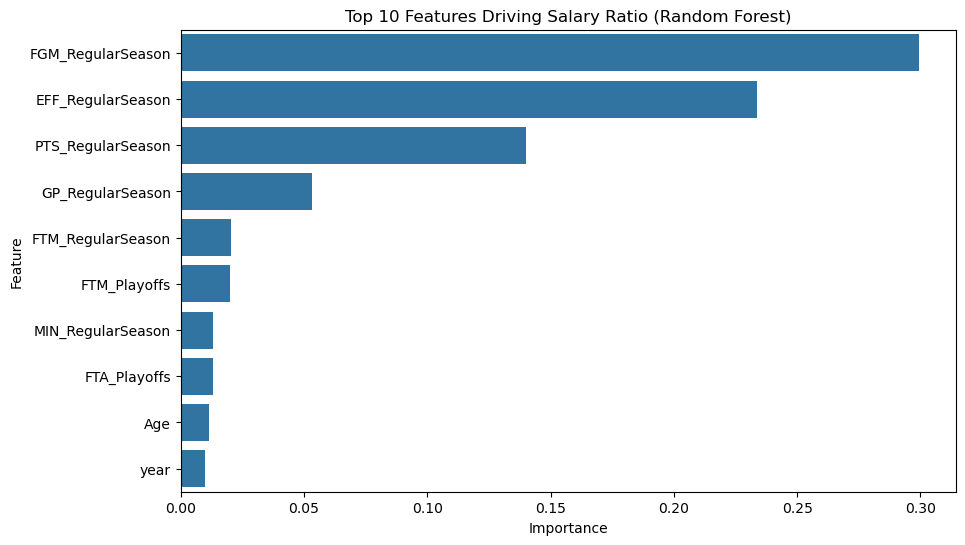

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: feature importance from RandomForest
rf = models["RandomForest"]
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.head(10), y=feat_imp.head(10).index)
plt.title("Top 10 Features Driving Salary Ratio (Random Forest)")
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

## Cross Validation

In [349]:
results_cv = []

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=7, scoring="r2")
    results_cv.append({
        "Model": name,
        "Mean_R2": np.mean(scores),
        "Std_R2": np.std(scores),
        "Scores": scores
    })

cv_results_df = pd.DataFrame(results_cv).sort_values(by="Mean_R2", ascending=False)
display(cv_results_df)

,Model,Mean_R2,Std_R2,Scores
5,RandomForest,0.740401,0.058345,"[0.6182524852689216, 0.7381869543031393, 0.723..."
6,XGBoost,0.728506,0.054800,"[0.6110918521881104, 0.7528814077377319, 0.722..."
3,Ridge,0.717759,0.050499,"[0.6066097084568252, 0.7132255784648728, 0.703..."
4,Lasso,0.717650,0.049529,"[0.6171508871535278, 0.7055642158184701, 0.686..."
2,LinearRegression,0.706415,0.049673,"[0.5972967354831062, 0.7124070842032246, 0.697..."
0,MeanBaseline,-0.151278,0.246551,"[-0.009770471426389316, -0.09771874235426381, ..."
1,MedianBaseline,-0.285792,0.174382,"[-0.35182226131309235, -0.5126713740803108, -0..."


- Random Forest outperforms XGBoost in our cross validation test...

In [358]:
folds = [3, 5, 7, 10]
rf_scores_means, rf_scores_stds = [], []
xgb_scores_means, xgb_scores_stds = [], []

rf_model = models["RandomForest"]
xgb_model = models["XGBoost"]

for k in folds:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    
    rf_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='r2')
    xgb_scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='r2')
    
    rf_scores_means.append(rf_scores.mean())
    rf_scores_stds.append(rf_scores.std())
    xgb_scores_means.append(xgb_scores.mean())
    xgb_scores_stds.append(xgb_scores.std())

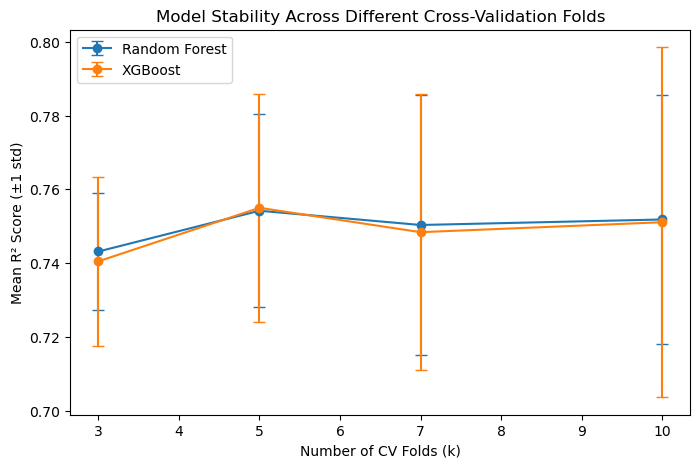

In [359]:
# Plot results
plt.figure(figsize=(8,5))
plt.errorbar(folds, rf_scores_means, yerr=rf_scores_stds, fmt='-o', label='Random Forest', capsize=4)
plt.errorbar(folds, xgb_scores_means, yerr=xgb_scores_stds, fmt='-o', label='XGBoost', capsize=4)
plt.xlabel("Number of CV Folds (k)")
plt.ylabel("Mean R² Score (±1 std)")
plt.title("Model Stability Across Different Cross-Validation Folds")
plt.legend()
plt.show()

- XGBoost is likely overfitting to our single test set, causing it perform better on our intial tests but worse when cross validation is used.

# Hyperparameter Tuning

Based on our results, we will use RandomForestRegressor as our model, as it performed the strongest on our cross-valdation testing

In [360]:
from scipy.stats import randint

cv7 = KFold(n_splits=7, shuffle=True, random_state=42)

rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_rand_space = {
    "n_estimators": randint(300, 1001),
    "max_depth": [None, 8, 10, 12, 14, 16, 18],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", 0.5, 0.7],
    "bootstrap": [True],
    "max_samples": [None, 0.7, 0.85],
    "min_impurity_decrease": [0.0, 1e-4, 1e-3],
    "ccp_alpha": [0.0, 1e-5, 1e-4]
}

rf_rs = RandomizedSearchCV(
    rf_base, rf_rand_space, n_iter=50, scoring="r2", cv=cv7,
    n_jobs=-1, random_state=42, verbose=1, refit=True
)

rf_rs.fit(X, y)

print("RF random best R²:", rf_rs.best_score_)
print("RF random best params:", rf_rs.best_params_)

Fitting 7 folds for each of 50 candidates, totalling 350 fits
RF random best R²: 0.7480369811505753
RF random best params: {'bootstrap': True, 'ccp_alpha': 0.0, 'max_depth': 14, 'max_features': 0.7, 'max_samples': 0.85, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 958}


In [363]:
best_randomforest_model = rf_rs.best_estimator_

# Predicting Future Values

Now that we have our optimal model, we can use it to predict future contract values for players based on their performance in the most recent 2024-25 NBA season.